In [1]:
!pip install spacy
!pip install wordcloud

In [2]:
import numpy as np
import pandas as pd 
import string
import spacy 

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [4]:
book=pd.read_csv("MI10.txt",error_bad_lines=False)
book

,x
0,"Great product by redmi, but I request to redmi..."
1,FNever buy chip quality battery drain issues d...
2,Previous owner of Redmi 7 2gb 32gb\nRedmi Note...
3,"Finally, Xiaomi has decided to design for its ..."
4,This 6.43-inch display with the Full HD Plus r...
5,This mobile i used only 3 days and mobile star...
6,It has good specifications.... Cut 1star bcoz ...
7,Satisfied with this product. Best phone under ...
8,I am not impressed with this phone. Samsung ph...
9,Everything is good in the phone..\nI use redmi...


In [5]:
book = [x.strip() for x in book.x]
book = [x for x in book if x]
book[0:10]

["Great product by redmi, but I request to redmi please don't make fake sale",
 "FNever buy chip quality battery drain issues don't buy",
 "Previous owner of Redmi 7 2gb 32gb\nRedmi Note 10 4gb 64gb was blazing fast\n\nIf you aren't able to buy this wait till Xiaomi release the same in poco with 6gb ram for the same price, like they did with Redmi power with a downgrade in camera, They won't remove the 48mp camera, They may decrease or remove the remaining cameras in poco version of resmi note 10\n\nAbout Amazon sale I logged in to amazon.in in my pc and clicked on join wait list around 12:02, then opened the app and booked the phone I was in queue for almost 20 to 25 minutes, the next step was payment which was a pain in the head, no COD, Note: only upi ids with number@ are accepted, I added a card Note: Check if ecommerce payments is enabled for your card\n\nIn the allocated 15 minutes the order was booked but payment failed, thankfully I was allowed to pay again\n\nAlso while I was 

In [6]:
!python -m spacy download en_core_web_md

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [7]:
nlp = spacy.load('en_core_web_md')

one_block = book[2]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [8]:
for token in doc_block[0:20]:
    print(token, token.pos_)

Previous ADJ
owner NOUN
of ADP
Redmi PROPN
7 NUM
2 NUM
gb NOUN
32 NUM
gb NOUN

 SPACE
Redmi PROPN
Note PROPN
10 NUM
4 NUM
gb NUM
64 NUM
gb NOUN
was AUX
blazing VERB
fast ADJ


In [9]:
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[5:25])

['are', 'buy', 'wait', 'release', 'gb', 'ram', 'price', 'did', 'power', 'downgrade', 'camera', 'remove', 'camera', 'decrease', 'remove', 'remaining', 'cameras', 'version', 'resmi', 'note']


In [10]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

,word,count
0,gb,4
1,note,3
2,phone,3
3,buy,2
4,wait,2
5,price,2
6,camera,2
7,remove,2
8,pc,2
9,booked,2


<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

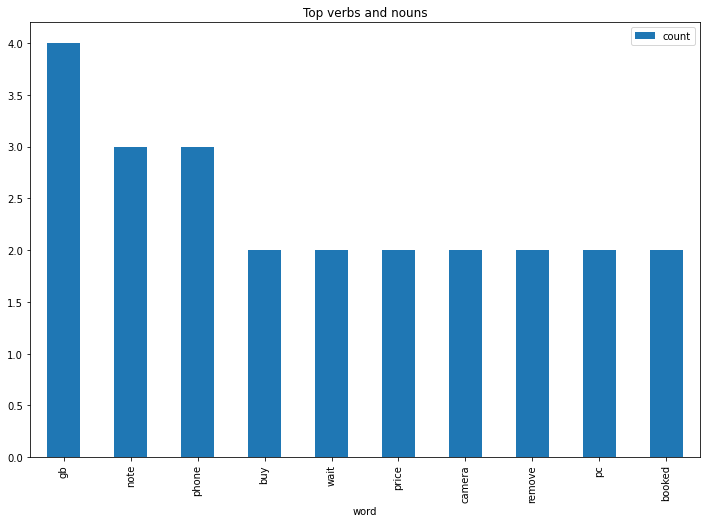

In [11]:
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

In [12]:
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [13]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [14]:
book=pd.read_csv("apple.txt",error_bad_lines=False)
book = [x.strip() for x in book.x] 
book = [x for x in book if x] 

b'Skipping line 6: expected 1 fields, saw 14\n'


In [15]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(book))
sentences[5:15]

['), all printers are not compatible (e.g.',
 "the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by working on these (still mostly the document and slides either do not open in windows environment or have distortion issues).",
 'you need to spend extra for an external CD writer and tp buy a carry bag.',
 'Mac con not be connected to most of the projectors unless you buy some connectors, which are expensive and theres no clarity which one to buy and from where.',
 "you can't connect it to your TV, the ports are different and again theres no clarity - customer support, manuals or help section are silent !",
 'Marketing strategy for Indian market, if at all has been planned, has been very bad.',
 'If these critical issues (and a few more not mentioned here) are handled properly, the Mac can sweep away other laptops in India.',
 "Presently, it doesn't seem to be happening.Overall V

In [16]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,It's amazing..... battery last around 10 -12 h...
1,Got it in 50k in Diwali sale.
2,Technically good laptop.Good News.luxury produ...
3,Terrific sense of possession & pride.Bad News.
4,Problems will be there if you are switching fr...
...,...
182,You can get one of the best movie experiences ...
183,Overall I would it a 4.5/5.
184,"I got a great deal on this laptop, which I hav..."
185,I got it not only on discount but also was abl...


In [17]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [20]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [21]:
calculate_sentiment(text = 'amazing')

4

In [22]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [23]:
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0    17
1     7
2    31
3     7
4    65
5     7
6    47
7    16
8    29
9    26
Name: word_count, dtype: int64

In [24]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
110,"The build is super strong, the operating syste...",5,10
142,Except for not so good sound quality while wat...,5,19
179,great product The elegant work of apple can be...,5,13
64,I hope this comment can help to save somebody’...,6,10
103,The switch was inspired by the awesome reviews...,6,13
46,Ships with macOS sierra but update is availabl...,6,86
59,I use this for music production and it works a...,7,30
0,It's amazing..... battery last around 10 -12 h...,7,17
151,..So now I m working with the external keyboar...,17,113
86,"All are Gud.. For now.. Apple,apple,apple, tha...",24,184


In [25]:
sent_df['sentiment_value'].describe()

count    187.000000
mean       0.914439
std        3.347789
min      -11.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       24.000000
Name: sentiment_value, dtype: float64

In [26]:
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
1,Got it in 50k in Diwali sale.,0,7
4,Problems will be there if you are switching fr...,-11,65
5,"), all printers are not compatible (e.g.",0,7
7,you need to spend extra for an external CD wri...,0,16
10,"Marketing strategy for Indian market, if at al...",-3,15


In [27]:
sent_df[sent_df['sentiment_value']>=20].head()

,sentence,sentiment_value,word_count
86,"All are Gud.. For now.. Apple,apple,apple, tha...",24,184


In [28]:
sent_df['index']=range(0,len(sent_df))

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

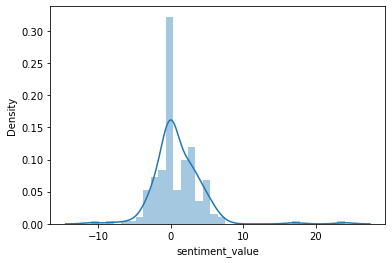

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

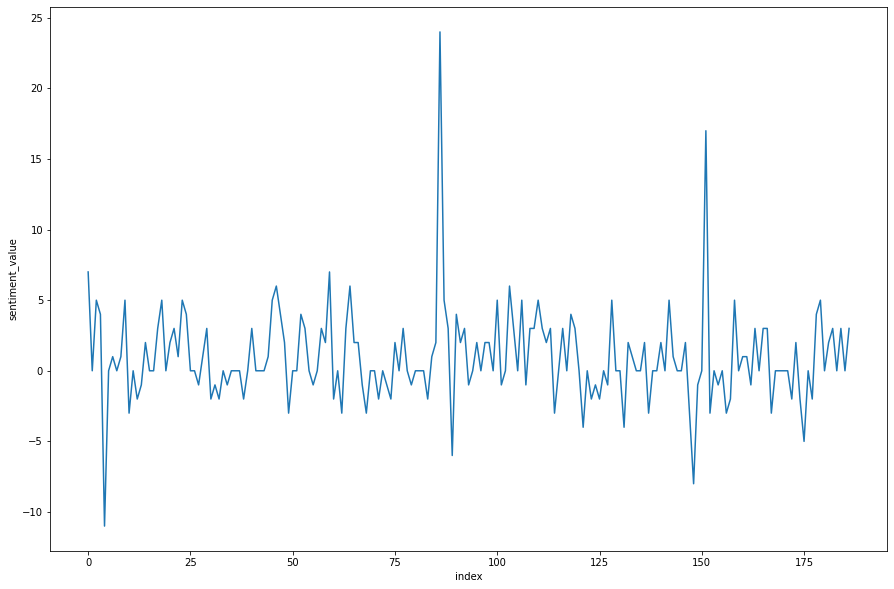

In [30]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

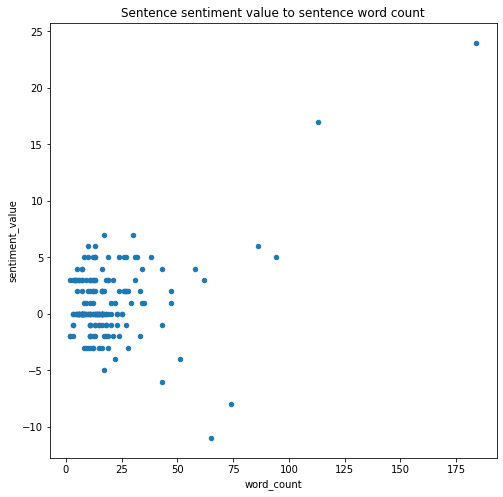

In [31]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')